In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import csv
import networkx as nx
import time
from datetime import timedelta
import community
from copy import deepcopy
import itertools
from community import community_louvain
import matplotlib.cm as cm

In [2]:
df=pd.read_csv(r'Primary School-Day 1(Duration).txt',header=None)
df.index = np.arange(1, len(df) + 1)
df[0]=df[0].str.split('\t')
df

,0
1,"[1789, 1821, 20]"
2,"[1789, 1783, 300]"
3,"[1789, 1778, 740]"
4,"[1789, 1722, 20]"
5,"[1789, 1902, 20]"
...,...
5895,"[1763, 1765, 20]"
5896,"[1760, 1766, 480]"
5897,"[1760, 1764, 140]"
5898,"[1766, 1764, 20]"


In [3]:
keys=[]
for i in df[0]:
    if int(i[0]) not in keys:
        keys.append(int(i[0]))
D={}
values=range(0,232)
for i in values:
    D[str(keys[i])] = values[i]+1

In [4]:
for i,j in D.items():
    for l in df[0]:
        if i in set(l):
            l[l.index(i)]=j

In [5]:
for j in range(1,len(df[0])+1):
    df[0][j]=' '.join(str(v) for v in df[0][j])

In [6]:
df.to_csv(r'Primary School-Day 1(Duration-fixed_id).txt', header=None, index=None, quoting=csv.QUOTE_NONE, escapechar=' ')

In [7]:
df=pd.read_csv(r'Primary School-Day 1(Duration-fixed_id).txt',header=None)
df.index = np.arange(1, len(df) + 1)
df[0]=df[0].str.split('  ')
df

,0
1,"[1, 48, 20]"
2,"[1, 4, 300]"
3,"[1, 14, 740]"
4,"[1, 99, 20]"
5,"[1, 117, 20]"
...,...
5895,"[229, 233, 20]"
5896,"[230, 231, 480]"
5897,"[230, 232, 140]"
5898,"[231, 232, 20]"


In [8]:
## Rescale weigths in [0,1] by dividing with maximum value
m=max(int(l[2]) for l in df[0])
for j in range(1,len(df[0])+1):
    df[0][j][2]=int(df[0][j][2])/m
    df[0][j][2]=round(df[0][j][2],8)
    df[0][j][2]=str(df[0][j][2])
    df[0][j]=' '.join(df[0][j])
df

,0
1,1 48 0.00215054
2,1 4 0.03225806
3,1 14 0.07956989
4,1 99 0.00215054
5,1 117 0.00215054
...,...
5895,229 233 0.00215054
5896,230 231 0.0516129
5897,230 232 0.01505376
5898,231 232 0.00215054


In [9]:
## save csv locally
df.to_csv(r'Primary School-Day 1(Duration-rescaled_weights).txt', header=None, index=None, quoting=csv.QUOTE_NONE, escapechar=' ')

In [10]:
## create graph with the rescaled weights with Networkx
Data=open(r'Primary School-Day 1(Duration-rescaled_weights).txt', "r")
Graphtype=nx.Graph()
G=nx.read_weighted_edgelist(Data,create_using=Graphtype)

In [11]:
## create file for Gephi
nx.write_gexf(G, r'Primary School-Day 1(Duration-rescaled_weights).gexf')

In [12]:
## Execute Louvain method to get the communities
part=community_louvain.best_partition(G,weight='weight')
modularity = community.modularity(part, G, weight='weight')
print("The modularity Q based on networkx is {}".format(modularity))

The modularity Q based on networkx is 0.6699935313088533


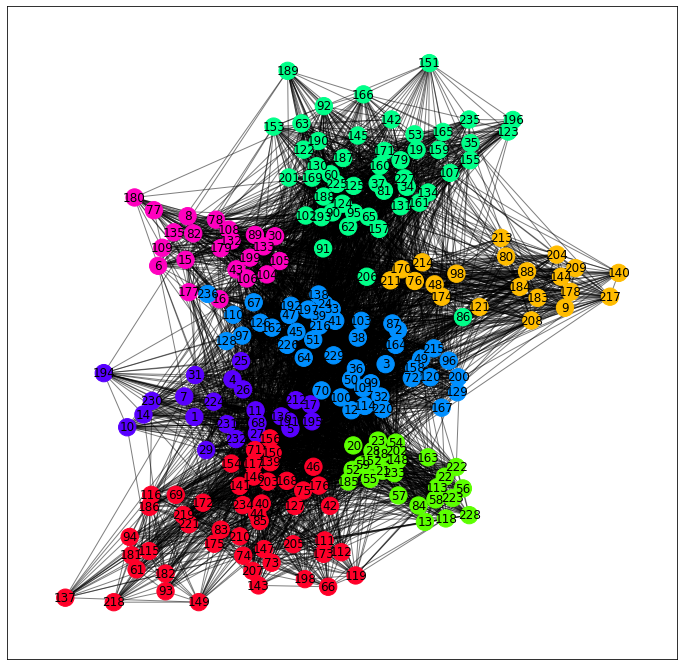

In [13]:
## plot community structure
pos = nx.spring_layout(G)
cmap = cm.get_cmap('gist_rainbow', max(part.values()) + 1)
plt.figure(figsize=(12,12))
nx.draw_networkx_nodes(G, pos, part.keys(), node_size=300,
                       cmap=cmap, node_color=list(part.values()))
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.draw()

In [14]:
df=pd.read_csv(r'Primary School-Day 1(Duration-rescaled_weights)_2.txt')
df.drop([0],inplace=True)
df['% sym weighted']=df['% sym weighted'].str.split('  ')
df

,% sym weighted
1,"[1, 48, 0.00215054]"
2,"[1, 4, 0.03225806]"
3,"[1, 14, 0.07956989]"
4,"[1, 99, 0.00215054]"
5,"[1, 117, 0.00215054]"
...,...
5895,"[229, 233, 0.00215054]"
5896,"[230, 231, 0.0516129]"
5897,"[230, 232, 0.01505376]"
5898,"[231, 232, 0.00215054]"


In [15]:
## Saves dictionarys to json
def save_dict(diction):
    json_d=json.dumps(diction)
    f=open('Dictionary.json',"w")
    f.write(json_d)
    f.close()

In [16]:
## Dictionary with each node's incident edges
def conn_edges(lst):
    Dict = {}
    for i in range(1,237):
        Dict[str(i)] = []
        for l in lst:   
            if int(l[0])==i:
                    Dict[str(i)].append(l[1])
    return Dict

In [17]:
## Fill missing values
def misval(dct):
    for i in range(1,len(dct)+1):
        for j in range(2,len(dct)+1):
            if str(j) in dct[str(i)]:
                dct[str(j)].append(i)
    for key, value in dct.items(): #Convert values to integers
        dct[key] = [int(item) for item in value]
    return dct

In [18]:
with open(r'Parition_2.json','r') as j:
    part=json.loads(j.read())

In [19]:
## neighbors of each node
All_edges=conn_edges(df['% sym weighted'])
All_edges=misval(All_edges)

In [20]:
save_dict(All_edges) ## save dictionary of neighbors

In [21]:
## find the Endogenous Ee and Exogenous Ex sets
def endog(lst):
    Dict_1 = {}
    Dict_2 = {}
    for i in range(1,237):
        Dict_1[str(i)] = []
        Dict_2[str(i)] = []
        for l in lst:   
            if int(l[0])==i:
                if part[(l[1])]==part[l[0]]:
                    Dict_1[str(i)].append(l[1])
            else:
                Dict_2[str(i)].append(l[1])
    return Dict_1,Dict_2

In [22]:
E_e,E_x=endog(df['% sym weighted'])
E_e=misval(E_e)

In [23]:
save_dict(E_e) ## save dictionary of Enogenous set

In [24]:
## create dictionary for each node, with the weights of each endogenous edge
def dictweights(dct,lst):
    w={}
    for i in range(1,237):
        w[str(i)] = {}
        for j in range(1,len(lst)+1):
            for values in dct[str(i)]:
                if i<values:
                    if int(lst[j][0])==i:
                        if values==int(lst[j][1]):
                            w[str(i)].update({values:float(lst[j][2])})
                else:
                    if int(lst[j][0])==values:
                        if i==int(lst[j][1]):
                            w[str(i)].update({values:float(lst[j][2])})
    return w

In [25]:
weights=dictweights(E_e,df['% sym weighted'])

In [26]:
## sort the dictionary of weights and the nodes in Ee, in decreasing order
def sortweights(dct_w,dct_E):
    sorted_dct_w={}
    for i in range (1,len(dct_w)+1):
        sorted_dct_w[i]=sorted(dct_w[str(i)].items(), key=lambda x:x[1], reverse=True)
        dct_w[str(i)]=dict(sorted_dct_w[i])
        dct_E[str(i)]=list(dct_w[str(i)].keys())
    return dct_w,dct_E

In [27]:
save_dict(weights) ## save dictionary of weights

In [28]:
weights=sortweights(weights,E_e)

In [29]:
save_dict(E_e) ## save the sorted Ee set

In [30]:
def binary_search(Graphhh,node,cause,d_l,d_r,parttt,intervent_set,e):
    d_m=(d_l+d_r)/2
    Graphhh[str(node)][str(cause)]['weight']=d_m # Intervention
    new_part=deepcopy(parttt) # keep the communities of all nodes fixed (we put v in singleton in def calc_com)
    new_part[str(node)]=calc_comm(node,parttt,new_part,All_edges,intervent_set)
    while new_part[str(node)]!=parttt[str(node)]:
        if d_r-d_l<=e:
            d_m=round(d_m,6)            
            owr=round(weights[0][str(node)][cause]-d_m,6)
            return owr,d_m
        else:
            d_l=d_m
            return binary_search(Graphhh,node,cause,d_l,d_r,parttt,intervent_set,e)
    else:
        d_r=d_m
        return binary_search(Graphhh,node,cause,d_l,d_r,parttt,intervent_set,e)

In [31]:
def calc_comm(node,partit,n_partit,A_edges,interv_set): ## our approach to recalculate partition after the intervention
    max_modul=0
    n_A_edges=deepcopy(A_edges[str(node)]) ## create a new set of neighbors
    for i in interv_set: ## remove the deleted edges from the copy 
        n_A_edges.remove(int(i[1]))
    n_partit[str(node)]=len(set(val for dic in partit for val in partit.values()))+1 ## put v in a singleton community
    singleton_com=n_partit[str(node)] # the singleton community we put v
    if len(n_A_edges)==0: # the case were v after the intervention has no neighbors, unary community 
        best_part=partit[str(node)]
        return best_part
    else:
        lst=[]
        for i in n_A_edges:
            if i not in lst:
                n_partit[str(node)]=partit[str(i)] # put v in partition of neighbor
                modularity=community.modularity(n_partit, G, weight='weight') # calculate modularity
                if modularity>max_modul: # if modularity is greater than the previous one
                    max_modul=modularity # save modularity
                    best_part=partit[str(i)] # place v in the community where the modularity is maximized
                n_partit[str(node)]=singleton_com # place v back to the singleton community for the next iteration
                lst.append(i)
    return best_part

In [32]:
def find_causes(Graf,dict_part,dict_endog):
    Dict_counter={} #Dictionary for counterfactuals
    Dict_Gamma={} #Dictionary for contingencies
    list_causes=[{} for n in range(len(dict_endog)+1)]
    for j in range(1,len(dict_endog)+1):
        Dict_counter[str(j)]=[]
        Dict_Gamma[str(j)]=[]
        for i in range(0,len(dict_endog[str(j)])):
            ebunch=[(str(j),str(dict_endog[str(j)][i]))] ## node to remove
            Graf.remove_edges_from(ebunch) #Intervention
            new_partition=deepcopy(dict_part) # keep the communities of all nodes fixed (we put v in singleton in def calc_com)
            new_partition[str(j)]=calc_comm(j,dict_part,new_partition,All_edges,ebunch)
            if new_partition[str(j)]!=dict_part[str(j)]:
                Graf.add_edge(str(j),str(dict_endog[str(j)][i]),weight=weights[0][str(j)][dict_endog[str(j)][i]])
                optimal_red,n_weight=binary_search(Graf,j,dict_endog[str(j)][i],0,weights[0][str(j)][dict_endog[str(j)][i]],dict_part,ebunch,0.001)
                counterf_cause=dict_endog[str(j)][i]
                resp=1/(1 + optimal_red)
                Dict_counter[str(j)].append(counterf_cause) # add cause to dictionary
                list_causes[j]={'Node':j,'Counterfactual cause':dict_endog[str(j)][i],'Binary':dict_endog[str(j)][i],'Old partition':dict_part[str(j)],'New partition':new_partition[str(j)],'Old Weight':weights[0][str(j)][dict_endog[str(j)][i]],'New weight':n_weight,'Weight Reduction':optimal_red,'Responsibility score':resp}
                print('For node',j,'a counterfactual cause has been found:',counterf_cause, '. The old weight is=',weights[0][str(j)][counterf_cause],'and the new weight=',n_weight,'.The optimar reduction is=',optimal_red,'and the resposnibility score is ρ =',resp)
            else:
                Dict_Gamma[str(j)].append(dict_endog[str(j)][i])
            ## Undo the intervention    
            new_partition=dict_part
            Graf.add_edge(str(j),str(dict_endog[str(j)][i]),weight=weights[0][str(j)][dict_endog[str(j)][i]])
    return Dict_counter,Dict_Gamma,list_causes

In [33]:
Counterf_causes,Cont_sets,count_causes=find_causes(G,part,E_e)

For node 86 a counterfactual cause has been found: 206 . The old weight is= 0.11182796 and the new weight= 0.111391 .The optimar reduction is= 0.000437 and the resposnibility score is ρ = 0.999563190885583
For node 86 a counterfactual cause has been found: 19 . The old weight is= 0.00215054 and the new weight= 0.001882 .The optimar reduction is= 0.000269 and the resposnibility score is ρ = 0.99973107234154
For node 86 a counterfactual cause has been found: 122 . The old weight is= 0.00215054 and the new weight= 0.001882 .The optimar reduction is= 0.000269 and the resposnibility score is ρ = 0.99973107234154
For node 86 a counterfactual cause has been found: 92 . The old weight is= 0.00215054 and the new weight= 0.001882 .The optimar reduction is= 0.000269 and the resposnibility score is ρ = 0.99973107234154
For node 86 a counterfactual cause has been found: 169 . The old weight is= 0.00215054 and the new weight= 0.001882 .The optimar reduction is= 0.000269 and the resposnibility score 

In [34]:
count_causes=[item for item in count_causes if item]
count_causes

[{'Node': 86,
  'Counterfactual cause': 165,
  'Binary': 165,
  'Old partition': 2,
  'New partition': 1,
  'Old Weight': 0.00215054,
  'New weight': 0.001882,
  'Weight Reduction': 0.000269,
  'Responsibility score': 0.99973107234154},
 {'Node': 206,
  'Counterfactual cause': 91,
  'Binary': 91,
  'Old partition': 2,
  'New partition': 5,
  'Old Weight': 0.26666667,
  'New weight': 0.133594,
  'Weight Reduction': 0.133073,
  'Responsibility score': 0.8825556694052369}]

In [35]:
for i in range(1,len(Counterf_causes)+1):
    if len(Counterf_causes[str(i)])==0:
        del Counterf_causes[str(i)]
    if len(Cont_sets[str(i)])==0:
        del Cont_sets[str(i)]

In [36]:
Counterf_causes

{'86': [206, 19, 122, 92, 169, 227, 165], '206': [91]}

In [37]:
## delete first edge e (fixed node)
for i in Cont_sets:
    del Cont_sets[str(i)][0]

In [38]:
## Saves dictionarys to json
def save_dict(diction):
    json_d=json.dumps(diction)
    f=open('Dictionary.json',"w")
    f.write(json_d)
    f.close()

In [39]:
save_dict(Cont_sets)

In [40]:
save_dict(Counterf_causes)

In [41]:
## Create contingencies with 5 edges at most
Cont_sets_5dim=deepcopy(Cont_sets)
for key in Cont_sets_5dim:
    if len(Cont_sets_5dim[key])>5:
        del Cont_sets_5dim[key][5:]

In [42]:
def intervention(Gra,node_1,node_2,edge_set,partit,new_parttt):
    w=Gra[str(node_1)][str(node_2)]['weight'] ## save the weight of the intervened edge
    ebunch=[(str(node_1),str(node_2))] ## node to remove, max reduction for j
    Gra.remove_edges_from(ebunch) #Intervention
    new_parttt[str(node_1)]=calc_comm(node_1,partit,new_parttt,All_edges,ebunch)
    n=new_parttt[str(node_1)]
    if new_parttt[str(node_1)]!=partit[str(node_1)]:
        ## Undo intervention
        new_parttt=partit
        Gra.add_edge(str(node_1),str(node_2),weight=w)
        return True,n
    else:
        ## Undo intervention
        new_parttt=partit
        Gra.add_edge(str(node_1),str(node_2),weight=w)
        return False,n

In [43]:
def multi_binary_search(Gra,node,Endog_set,contingency,weights_set,parttt):
    e=Endog_set[str(node)][0] # define fixed node e
    print("Finding contingencies for actual cause ",e)
    Dw_e=weights_set[0][str(node)][e] # weight reduction of e
    Gra.remove_edge(str(node),str(e)) # intervention of fixed node e (max reduction)
    max_dimensions=len(contingency[str(node)])
    for i in range(1,max_dimensions+1):
        if i==1: ## if |Γ|=1, we have 1 Binary search in the single edge of Γ
            cont_1=contingency[str(node)][0]
            new_partittt=deepcopy(parttt) # keep the communities of all nodes fixed (we put v in singleton in def calc_com)
            inter,new_partittt[str(node)]=intervention(Gra,node,cont_1,contingency,parttt,new_partittt)
            if inter==True:
                ebunch=[(str(node),str(e))] #removal
                optimal_red,n_weight=binary_search(Gra,node,cont_1,0,weights_set[0][str(node)][cont_1],parttt,ebunch,0.001)
                resp=1/(1 + Dw_e + optimal_red)
                list_causes={'Fixed_node_e':e,'Contingency set':cont_1,'Binary':cont_1,'Old partition':parttt[str(node)],'New partition':new_partittt[str(node)],'Old Weight':weights[0][str(node)][cont_1],'New weight':n_weight,'Weight Reduction':optimal_red,'Responsibility score':resp}
                return list_causes
            else: ## the intervention is undone in def intervention
                continue
        combinations=list(itertools.combinations(contingency[str(node)],i)) ## produce all possible i-tuples for binary search
        list_causes=[{} for n in range(len(combinations))] ## lists to save causes etc
        if i==2:
            for j in range(0,len(combinations)): ## len=amount of different combinations
                ## max dq1, binary in q2
                resp_1=resp_2=0
                fisrt_node=combinations[j][0]
                second_node=combinations[j][1]
                Gra.remove_edge(str(node),str(fisrt_node))
                new_partittt=deepcopy(parttt) # keep the communities of all nodes fixed (we put v in singleton in def calc_com)
                inter,new_partittt[str(node)]=intervention(Gra,node,second_node,contingency,parttt,new_partittt)
                if inter==True: ### AMI SCORE IN DEF INTERVENTION
                    ebunch=[(str(node),str(e)),(str(node),str(fisrt_node))] # removals
                    optimal_red_1,n_weight_1=binary_search(Gra,node,second_node,0,weights_set[0][str(node)][second_node],parttt,ebunch,0.001)
                    weight_of_removed_node=weights_set[0][str(node)][fisrt_node]  
                    resp_1=1/(1 + Dw_e + weight_of_removed_node + optimal_red_1)
                    print('resp_1 =',resp_1)
                    ## save the causes, responsibility and new weights
                    list_causes[j]={'Fixed_node_e':e,'Contingency set':[fisrt_node,second_node],'Removed node':fisrt_node,'Binary':second_node,'Old partition':parttt[str(node)],'New partition':new_partittt[str(node)],'Old Weight':weights[0][node][second_node],'New weight':n_weight_1,'Weight reduction':optimal_red_1,'Responsibility score':resp_1}
                ## Undo intervention of removal (the second intervention is undone in def of intervention) 
                Gra.add_edge(str(node),str(fisrt_node),weight=weights_set[0][str(node)][fisrt_node])
                ## Undo intervention of Binary (not necessary, we remove this edge eventually in the next step)
                Gra[str(node)][str(second_node)]['weight']=weights_set[0][str(node)][second_node]
                ## max dq2, binary in q1               
                Gra.remove_edge(str(node),str(second_node))
                new_partittt=deepcopy(parttt) # keep the communities of all nodes fixed (we put v in singleton in def calc_com)
                inter,new_partittt[str(node)]=intervention(Gra,node,fisrt_node,contingency,parttt,new_partittt)
                if inter==True:
                    ebunch=[(str(node),str(e)),(str(node),str(second_node))] # removals
                    optimal_red_2,n_weight_2=binary_search(G,node,fisrt_node,0,weights_set[0][str(node)][fisrt_node],parttt,ebunch,0.001)
                    weight_of_removed_node=weights_set[0][str(node)][second_node]  
                    resp_2=1/(1 + Dw_e + weight_of_removed_node + optimal_red_2)
                    ## save the causes, responsibility and new weights
                    if resp_2>resp_1:
                        list_causes[j]={'Fixed_node_e':e,'Contingency set':[fisrt_node,second_node],'Removed node':second_node,'Binary':fisrt_node,'Old partition':parttt[str(node)],'New partition':new_partittt[str(node)],'Old Weight':weights[0][str(node)][fisrt_node],'New weight':n_weight_2,'Weight reduction':optimal_red_2,'Responsibility score':resp_2}
                ## Undo intervention of removal (the second intervention is undone in def of intervention)   
                Gra.add_edge(str(node),str(second_node),weight=weights[0][str(node)][second_node])
                ## Undo intervention of Binary
                Gra[str(node)][str(fisrt_node)]['weight']=weights_set[0][str(node)][fisrt_node]
                ## terminating condition (put in each if of inter a binary variable. If it's equal to 1 in the end of one iteration of j, stop)
            for l in list_causes:
                if len(l)!=0:
                    return list_causes
        if i==3:
            for j in range(0,len(combinations)): ## len=amount of different combinations
                ## max dq1, max q2, binary q3
                resp_1=resp_2=resp_3=0
                fisrt_node=combinations[j][0]
                second_node=combinations[j][1]
                third_node=combinations[j][2]
                Gra.remove_edge(str(node),str(fisrt_node))
                Gra.remove_edge(str(node),str(second_node))
                new_partittt=deepcopy(parttt) # keep the communities of all nodes fixed (we put v in singleton in def calc_com)
                inter,new_partittt[str(node)]=intervention(Gra,node,third_node,contingency,parttt,new_partittt)
                if inter==True: ### 
                    ebunch=[(str(node),str(e)),(str(node),str(fisrt_node)),(str(node),str(second_node))] # removals
                    optimal_red_1,n_weight_1=binary_search(Gra,node,third_node,0,weights[0][str(node)][third_node],parttt,ebunch,0.001)
                    weight_of_removed_nodes=weights_set[0][str(node)][fisrt_node] + weights_set[0][str(node)][second_node]  
                    resp_1=1/(1 + Dw_e + weight_of_removed_nodes + optimal_red_1)
                    print('resp_1 =',resp_1)
                    ## save the causes, responsibility and new weights
                    list_causes[j]={'Fixed_node_e':e,'Contingency set':[fisrt_node,second_node,third_node],'Removed nodes':[fisrt_node,second_node],'Binary':third_node,'Old partition':parttt[str(node)],'New partition':new_partittt[str(node)],'Old Weight':weights[0][str(node)][third_node],'New weight':n_weight_1,'Weight reduction':optimal_red_1,'Responsibility score':resp_1}
                ## Undo intervention (removal), the third intervention is undone in def of intervention    
                Gra.add_edge(str(node),str(fisrt_node),weight=weights[0][str(node)][fisrt_node])
                Gra.add_edge(str(node),str(second_node),weight=weights[0][str(node)][second_node])
                ## Undo intervention of Binary
                Gra[str(node)][str(third_node)]['weight']=weights_set[0][str(node)][third_node]
                ## max dq1, binary in q2, max dq3              
                Gra.remove_edge(str(node),str(fisrt_node))
                Gra.remove_edge(str(node),str(third_node))
                new_partittt=deepcopy(parttt) # keep the communities of all nodes fixed (we put v in singleton in def calc_com)
                inter,new_partittt[str(node)]=intervention(Gra,node,second_node,contingency,parttt,new_partittt)
                if inter==True:
                    ebunch=[(str(node),str(e)),(str(node),str(fisrt_node)),(str(node),str(third_node))] # removals
                    optimal_red_2,n_weight_2=binary_search(Gra,node,second_node,0,weights[0][str(node)][second_node],parttt,ebunch,0.001)
                    weight_of_removed_nodes=weights_set[0][str(node)][fisrt_node] + weights_set[0][str(node)][third_node]  
                    resp_2=1/(1 + Dw_e + weight_of_removed_nodes + optimal_red_2)
                    print('resp_2 =',resp_2)
                    ## save the causes, responsibility and new weights
                    if resp_2>resp_1:
                        list_causes[j]={'Fixed_node_e':e,'Contingency set':[fisrt_node,second_node,third_node],'Removed nodes':[fisrt_node,third_node],'Binary':second_node,'Old partition':parttt[str(node)],'New partition':new_partittt[str(node)],'Old Weight':weights[0][str(node)][second_node],'New weight':n_weight_2,'Weight reduction':optimal_red_2,'Responsibility score':resp_2}
                ## Undo intervention (removal), the second intervention is undone in def of intervention    
                Gra.add_edge(str(node),str(fisrt_node),weight=weights[0][str(node)][fisrt_node])
                Gra.add_edge(str(node),str(third_node),weight=weights[0][str(node)][third_node])
                ## Undo intervention of Binary
                Gra[str(node)][str(second_node)]['weight']=weights_set[0][str(node)][second_node]      
                ## binary in q1, max q2, max dq3              
                Gra.remove_edge(str(node),str(second_node))
                Gra.remove_edge(str(node),str(third_node))
                new_partittt=deepcopy(parttt) # keep the communities of all nodes fixed (we put v in singleton in def calc_com)
                inter,new_partittt[str(node)]=intervention(Gra,node,fisrt_node,contingency,parttt,new_partittt)
                if inter==True:
                    ebunch=[(str(node),str(e)),(str(node),str(second_node)),(str(node),str(third_node))] # removals
                    optimal_red_3,n_weight_3=binary_search(Gra,node,fisrt_node,0,weights[0][str(node)][fisrt_node],parttt,ebunch,0.001)
                    weight_of_removed_nodes=weights_set[0][str(node)][second_node] + weights_set[0][str(node)][third_node]  
                    resp_3=1/(1 + Dw_e + weight_of_removed_nodes + optimal_red_3)
                    print('resp_3 =',resp_3)
                    ## save the causes, responsibility and new weights
                    if resp_3>resp_1 and resp_3>resp_2:
                        list_causes[j]={'Fixed_node_e':e,'Contingency set':[fisrt_node,second_node,third_node],'Removed nodes':[second_node,third_node],'Binary':fisrt_node,'Old partition':parttt[str(node)],'New partition':new_partittt[str(node)],'Old Weight':weights[0][str(node)][fisrt_node],'New weight':n_weight_3,'Weight reduction':optimal_red_3,'Responsibility score':resp_3}
                ## Undo intervention (removal), the first intervention is undone in def of intervention    
                Gra.add_edge(str(node),str(second_node),weight=weights[0][str(node)][second_node])
                Gra.add_edge(str(node),str(third_node),weight=weights[0][str(node)][third_node])
                ## Undo intervention of Binary
                Gra[str(node)][str(fisrt_node)]['weight']=weights_set[0][str(node)][fisrt_node]
                ## terminating condition (put in each if of inter a binary variable. If it's equal to 1 in the end of one iteration of j, stop)
            for l in list_causes:
                if len(l)!=0:
                    return list_causes
        if i==4:
            for j in range(0,len(combinations)): ## len=amount of different combinations
                ## max dq1, max q2, binary q3
                resp_1=resp_2=resp_3=resp_4=0
                fisrt_node=combinations[j][0]
                second_node=combinations[j][1]
                third_node=combinations[j][2]
                fourth_node=combinations[j][3]
                Gra.remove_edge(str(node),str(fisrt_node))
                Gra.remove_edge(str(node),str(second_node))
                Gra.remove_edge(str(node),str(third_node))
                inter,new_partittt[str(node)]=intervention(Gra,node,fourth_node,contingency,parttt,new_partittt)
                if inter==True: ### AMI SCORE IN DEF INTERVENTION
                    ebunch=[(str(node),str(e)),(str(node),str(fisrt_node)),(str(node),str(second_node)),(str(node),str(third_node))] # removals
                    optimal_red_1,n_weight_1=binary_search(Gra,node,fourth_node,0,weights[0][str(node)][fourth_node],parttt,ebunch,0.001)
                    weight_of_removed_nodes=weights_set[0][str(node)][fisrt_node] + weights_set[0][str(node)][second_node] + weights_set[0][str(node)][third_node]  
                    resp_1=1/(1 + Dw_e + weight_of_removed_nodes + optimal_red_1)
                    print('resp_1 =',resp_1)
                    ## save the causes, responsibility and new weights
                    list_causes[j]={'Fixed_node_e':e,'Contingency set':[fisrt_node,second_node,third_node,fourth_node],'Removed nodes':[fisrt_node,second_node,third_node],'Binary':fourth_node,'Old partition':parttt[str(node)],'New partition':new_partittt[str(node)],'Old Weight':weights[0][str(node)][fourth_node],'New weight':n_weight_1,'Weight reduction':optimal_red_1,'Responsibility score':resp_1}
                ## Undo intervention (removal), the 4th intervention is undone in def of intervention    
                Gra.add_edge(str(node),str(fisrt_node),weight=weights[0][str(node)][fisrt_node])
                Gra.add_edge(str(node),str(second_node),weight=weights[0][str(node)][second_node])
                Gra.add_edge(str(node),str(third_node),weight=weights[0][str(node)][third_node])
                ## Undo intervention of Binary
                Gra[str(node)][str(fourth_node)]['weight']=weights_set[0][str(node)][fourth_node]
                ## max dq1, max dq2, binary dq3, max dq4              
                Gra.remove_edge(str(node),str(fisrt_node))
                Gra.remove_edge(str(node),str(second_node))
                Gra.remove_edge(str(node),str(fourth_node))
                inter,new_partittt[str(node)]=intervention(Gra,node,third_node,contingency,parttt,new_partittt)
                if inter==True: ### AMI SCORE IN DEF INTERVENTION
                    ebunch=[(str(node),str(e)),(str(node),str(fisrt_node)),(str(node),str(second_node)),(str(node),str(fourth_node))] # removals
                    optimal_red_2,n_weight_2=binary_search(Gra,node,fourth_node,0,weights[0][str(node)][third_node],parttt,ebunch,0.001)
                    weight_of_removed_nodes=weights_set[0][str(node)][fisrt_node] + weights_set[0][str(node)][second_node] + weights_set[0][str(node)][fourth_node]  
                    resp_2=1/(1 + Dw_e + weight_of_removed_nodes + optimal_red_2)
                    print('resp_2 =',resp_2)
                    ## save the causes, responsibility and new weights
                    list_causes[j]={'Fixed_node_e':e,'Contingency set':[fisrt_node,second_node,third_node,fourth_node],'Removed nodes':[fisrt_node,second_node,fourth_node],'Binary':third_node,'Old partition':parttt[str(node)],'New partition':new_partittt[str(node)],'Old Weight':weights[0][str(node)][third_node],'New weight':n_weight_2,'Weight reduction':optimal_red_2,'Responsibility score':resp_2}
                ## Undo intervention (removal), the 4th intervention is undone in def of intervention    
                Gra.add_edge(str(node),str(fisrt_node),weight=weights[0][str(node)][fisrt_node])
                Gra.add_edge(str(node),str(second_node),weight=weights[0][str(node)][second_node])
                Gra.add_edge(str(node),str(fourth_node),weight=weights[0][str(node)][fourth_node])
                ## Undo intervention of Binary
                Gra[str(node)][str(third_node)]['weight']=weights_set[0][str(node)][third_node]
                ## max dq1, binary dq2, max dq3, max dq4                
                Gra.remove_edge(str(node),str(fisrt_node))
                Gra.remove_edge(str(node),str(third_node))
                Gra.remove_edge(str(node),str(fourth_node))
                inter,new_partittt[str(node)]=intervention(Gra,node,second_node,contingency,parttt,new_partittt)
                if inter==True: ### AMI SCORE IN DEF INTERVENTION
                    ebunch=[(str(node),str(e)),(str(node),str(fisrt_node)),(str(node),str(third_node)),(str(node),str(fourth_node))] # removals
                    optimal_red_3,n_weight_3=binary_search(Gra,node,second_node,0,weights[0][str(node)][second_node],parttt,ebunch,0.001)
                    weight_of_removed_nodes=weights_set[0][str(node)][fisrt_node] + weights_set[0][str(node)][third_node] + weights_set[0][str(node)][fourth_node]  
                    resp_3=1/(1 + Dw_e + weight_of_removed_nodes + optimal_red_3)
                    print('resp_3 =',resp_3)
                    ## save the causes, responsibility and new weights
                    list_causes[j]={'Fixed_node_e':e,'Contingency set':[fisrt_node,second_node,third_node,fourth_node],'Removed nodes':[fisrt_node,third_node,fourth_node],'Binary':second_node,'Old partition':parttt[str(node)],'New partition':new_partittt[str(node)],'Old Weight':weights[0][str(node)][second_node],'New weight':n_weight_3,'Weight reduction':optimal_red_3,'Responsibility score':resp_3}
                    ## Undo intervention (removal), the 4th intervention is undone in def of intervention    
                Gra.add_edge(str(node),str(fisrt_node),weight=weights[0][str(node)][fisrt_node])
                Gra.add_edge(str(node),str(third_node),weight=weights[0][str(node)][third_node])
                Gra.add_edge(str(node),str(fourth_node),weight=weights[0][str(node)][fourth_node])
                ## Undo intervention of Binary
                Gra[str(node)][str(second_node)]['weight']=weights_set[0][str(node)][second_node]
                ## binary dq1, max dq2, max dq3, max dq4 
                Gra.remove_edge(str(node),str(second_node))
                Gra.remove_edge(str(node),str(third_node))
                Gra.remove_edge(str(node),str(fourth_node))
                inter,new_partittt[str(node)]=intervention(Gra,node,fisrt_node,contingency,parttt,new_partittt)
                if inter==True: ### AMI SCORE IN DEF INTERVENTION
                    ebunch=[(str(node),str(e)),(str(node),str(second_node)),(str(node),str(third_node)),(str(node),str(fourth_node))] # removals
                    optimal_red_4,n_weight_4=binary_search(Gra,node,fisrt_node,0,weights[0][str(node)][fisrt_node],parttt,ebunch,0.001)
                    weight_of_removed_nodes=weights_set[0][str(node)][third_node] + weights_set[0][str(node)][second_node] + weights_set[0][str(node)][fourth_node]  
                    resp_4=1/(1 + Dw_e + weight_of_removed_nodes + optimal_red_4)
                    print('resp_4 =',resp_4)
                    ## save the causes, responsibility and new weights
                    list_causes[j]={'Fixed_node_e':e,'Contingency set':[fisrt_node,second_node,third_node,fourth_node],'Removed nodes':[second_node,third_node,fourth_node],'Binary':fisrt_node,'Old partition':parttt[str(node)],'New partition':new_partittt[str(node)],'Old Weight':weights[0][str(node)][fisrt_node],'New weight':n_weight_4,'Weight reduction':optimal_red_4,'Responsibility score':resp_4}
                ## Undo intervention (removal), the 4th intervention is undone in def of intervention    
                Gra.add_edge(str(node),str(second_node),weight=weights[0][str(node)][second_node])
                Gra.add_edge(str(node),str(third_node),weight=weights[0][str(node)][third_node])
                Gra.add_edge(str(node),str(fourth_node),weight=weights[0][str(node)][fourth_node])
                ## Undo intervention of Binary
                Gra[str(node)][str(fisrt_node)]['weight']=weights_set[0][str(node)][fisrt_node]
                ## terminating condition (put in each if of inter a binary variable. If it's equal to 1 in the end of one iteration of j, stop)
            for l in list_causes:
                if len(l)!=0:
                    return list_causes
    return list_causes

In [49]:
actual_causes_214=multi_binary_search(G,214,E_e,Cont_sets_5dim,weights,part)

Finding contingencies for actual cause  213
resp_1 = 0.6367816424105184
resp_2 = 0.6368684901213546
resp_3 = 0.6368089858332927
resp_1 = 0.6368672124792755
resp_2 = 0.6368634972063569
resp_3 = 0.6368830799405898


In [50]:
actual_causes_214

[{'Fixed_node_e': 213,
  'Contingency set': [170, 211, 204],
  'Removed nodes': [170, 204],
  'Binary': 211,
  'Old partition': 1,
  'New partition': 5,
  'Old Weight': 0.04731183,
  'New weight': 0.012613,
  'Weight reduction': 0.034699,
  'Responsibility score': 0.6368684901213546},
 {'Fixed_node_e': 213,
  'Contingency set': [170, 211, 98],
  'Removed nodes': [211, 98],
  'Binary': 170,
  'Old partition': 1,
  'New partition': 5,
  'Old Weight': 0.12043011,
  'New weight': 0.001896,
  'Weight reduction': 0.118534,
  'Responsibility score': 0.6368830799405898},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {}]